In [18]:
# libraries for system
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image


# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



#import DL libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

['angry' 'angry' 'angry' ... 'surprised' 'surprised' 'surprised']


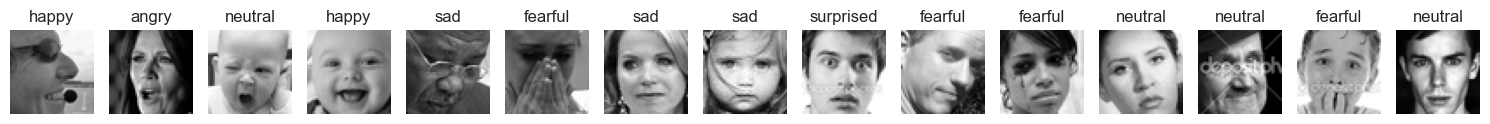

In [19]:
#Load data
data_directory=r'D:\AMIT\Project\Dataset\train'

#data preprocessing
images = []
labels = []

for emotion_folder in os.listdir(data_directory):
    if os.path.isdir(os.path.join(data_directory, emotion_folder)):
        for image_file in os.listdir(os.path.join(data_directory, emotion_folder)):
            # Load image
            image_path = os.path.join(data_directory, emotion_folder, image_file)
            image = Image.open(image_path).convert('L')  # Convert to grayscale
            image = image.resize((48, 48))  # Resize to 48x48
            image = np.array(image) / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(emotion_folder) # Use folder name (emotion) as label
 
          

images, labels = np.array(images), np.array(labels)

print(labels)

# Plot random images and display labels
num_samples = 15
random_indices = np.random.choice(len(images), num_samples, replace=False)

plt.figure(figsize=(15, 7))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[idx], cmap='gray')
    plt.title(labels[idx])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [38]:
# Split data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42,stratify=labels)


# Label encoding
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


num_classes = len(label_encoder.classes_)
train_labels = to_categorical(train_labels_encoded, num_classes=num_classes)
test_labels = to_categorical(test_labels_encoded, num_classes=num_classes)

# Get the mapping of numerical labels to original string labels
label_mapping = {class_index: class_label for class_index, class_label in enumerate(label_encoder.classes_)}

# Print the mapping
print("Label Mapping:")
for class_index, class_label in label_mapping.items():
    print(f"{class_index} -> {class_label}")

Label Mapping:
0 -> angry
1 -> disgusted
2 -> fearful
3 -> happy
4 -> neutral
5 -> sad
6 -> surprised


In [39]:
#Define the CNN model
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal', activation='softmax'))


# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')
# ])
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_images, train_labels, epochs=25, batch_size=32, validation_data=(test_images, test_labels), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/25
718/718 [==============================] - 93s 121ms/step - loss: 2.1687 - accuracy: 0.2205 - val_loss: 1.6918 - val_accuracy: 0.3401
Epoch 2/25
718/718 [==============================] - 93s 130ms/step - loss: 1.6506 - accuracy: 0.3520 - val_loss: 1.4361 - val_accuracy: 0.4356
Epoch 3/25
718/718 [==============================] - 92s 127ms/step - loss: 1.4668 - accuracy: 0.4370 - val_loss: 1.3333 - val_accuracy: 0.4902
Epoch 4/25
718/718 [==============================] - 98s 136ms/step - loss: 1.3641 - accuracy: 0.4817 - val_loss: 1.2333 - val_accuracy: 0.5268
Epoch 5/25
718/718 [==============================] - 103s 143ms/step - loss: 1.3047 - accuracy: 0.5045 - val_loss: 1.2323 - val_accuracy: 0.5312
Epoch 6/25
718/718 [==============================] - 103s 143ms/step - loss: 1.2441 - accuracy: 0.5372 - val_loss: 1.2184 - val_accuracy: 0.5357
Epoch 7/25
718/718 [==============================] - 104s 144ms/step - loss: 1.1906 - accuracy: 0.5587 - val_loss: 1.1536 - val

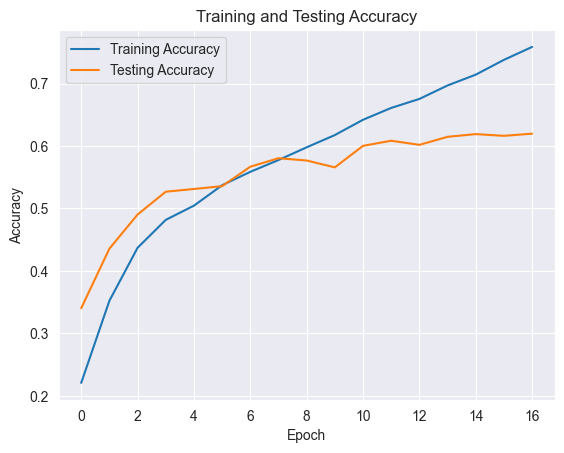

In [40]:
import matplotlib.pyplot as plt

# Get training and testing accuracy from history
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Plot training and testing accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


180/180 [==============================] - 5s 26ms/step


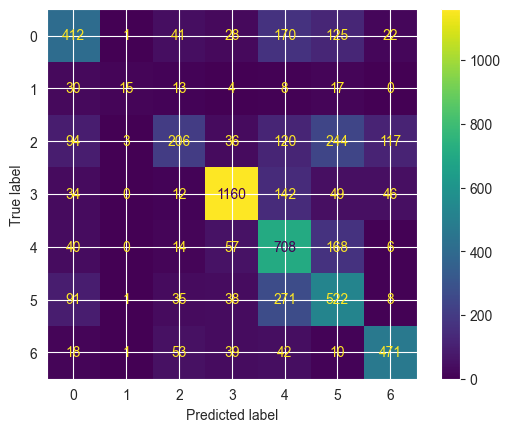

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

# Make predictions on test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels_onehot, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[ 412    1   41   28  170  125   22]
 [  30   15   13    4    8   17    0]
 [  94    3  206   36  120  244  117]
 [  34    0   12 1160  142   49   46]
 [  40    0   14   57  708  168    6]
 [  91    1   35   38  271  522    8]
 [  18    1   53   39   42   10  471]]


In [50]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(true_labels, predicted_labels, digits=4))


              precision    recall  f1-score   support

           0     0.5730    0.5156    0.5428       799
           1     0.7143    0.1724    0.2778        87
           2     0.5508    0.2512    0.3451       820
           3     0.8517    0.8039    0.8271      1443
           4     0.4846    0.7130    0.5770       993
           5     0.4599    0.5404    0.4969       966
           6     0.7030    0.7429    0.7224       634

    accuracy                         0.6085      5742
   macro avg     0.6196    0.5342    0.5413      5742
weighted avg     0.6220    0.6085    0.6000      5742



In [44]:
# Save the trained model
model.save('Model3.h5')

d:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 240ms/step
Image: im0.png


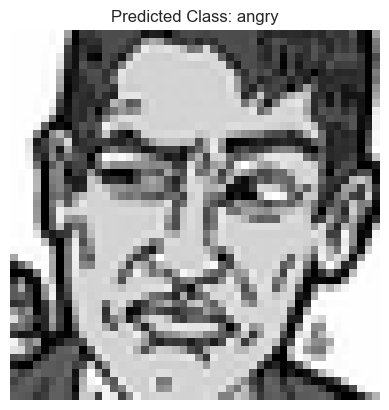

1/1 [==============================] - 0s 21ms/step
Image: im1.png


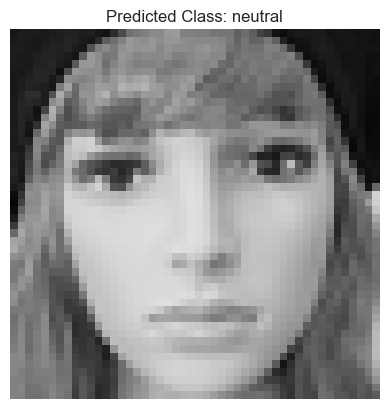

1/1 [==============================] - 0s 21ms/step
Image: im10.png


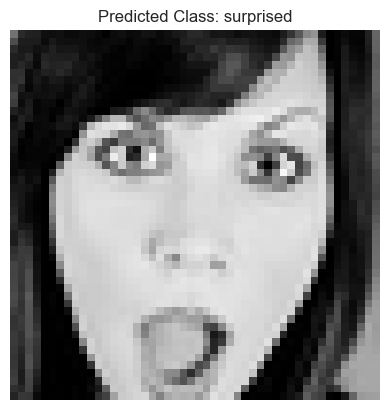

1/1 [==============================] - 0s 20ms/step
Image: im124.png


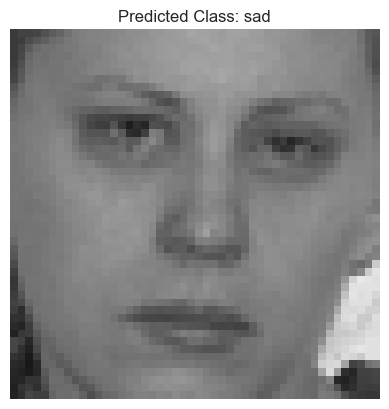

1/1 [==============================] - 0s 20ms/step
Image: im156.png


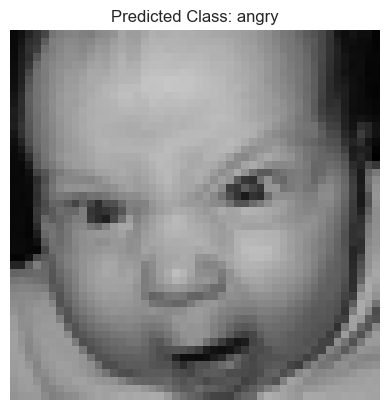

1/1 [==============================] - 0s 20ms/step
Image: im160.png


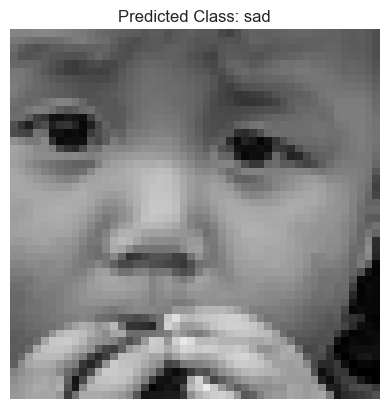

1/1 [==============================] - 0s 20ms/step
Image: im2.png


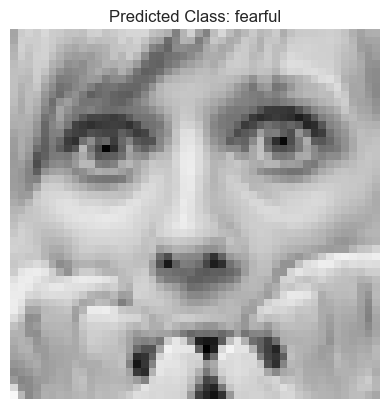

1/1 [==============================] - 0s 20ms/step
Image: im20.png


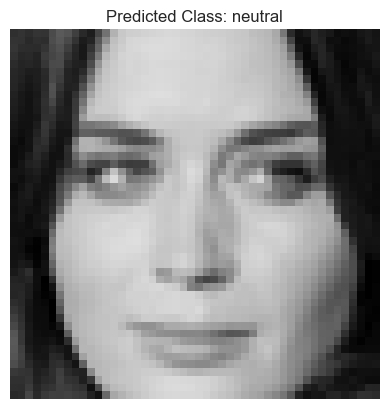

1/1 [==============================] - 0s 19ms/step
Image: im259.png


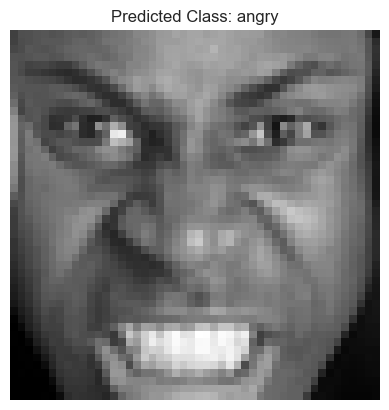

1/1 [==============================] - 0s 20ms/step
Image: im26.png


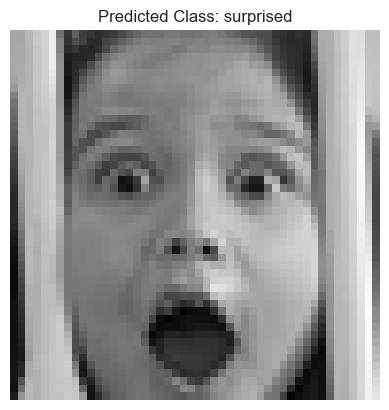

1/1 [==============================] - 0s 20ms/step
Image: im27.png


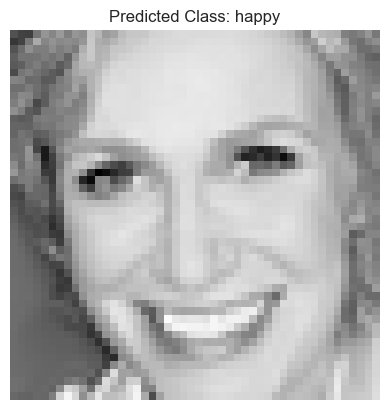

1/1 [==============================] - 0s 20ms/step
Image: im35.png


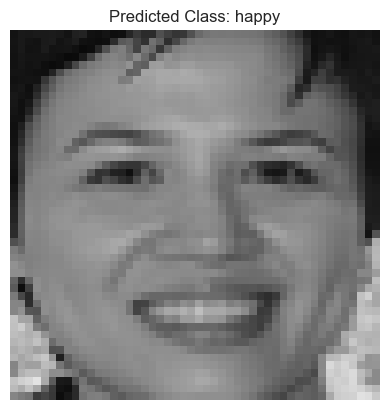

1/1 [==============================] - 0s 20ms/step
Image: im381.png


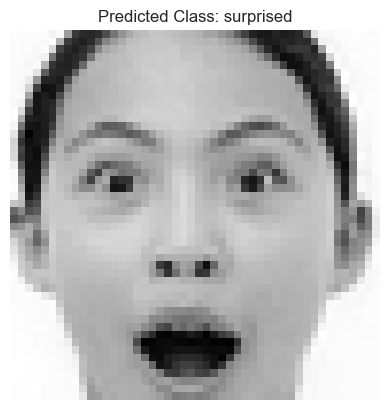

1/1 [==============================] - 0s 20ms/step
Image: im481.png


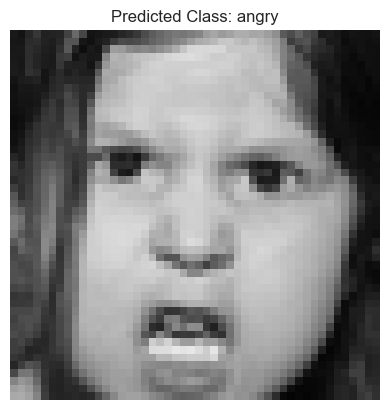

1/1 [==============================] - 0s 22ms/step
Image: im49.png


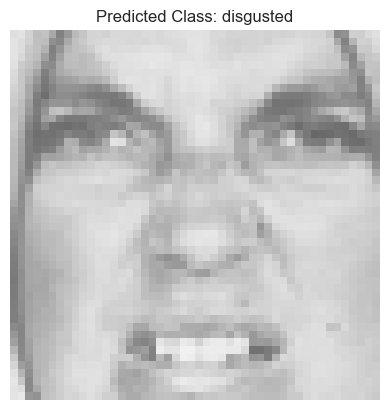

1/1 [==============================] - 0s 20ms/step
Image: im6.png


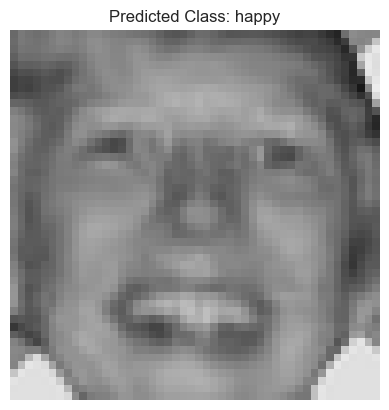

1/1 [==============================] - 0s 19ms/step
Image: im7.png


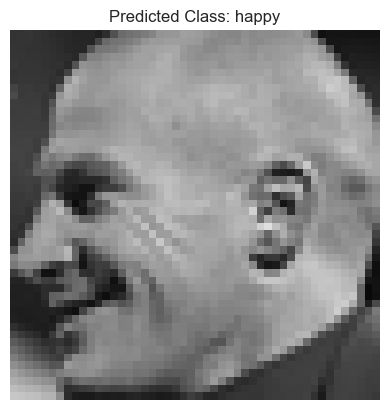

1/1 [==============================] - 0s 20ms/step
Image: im79.png


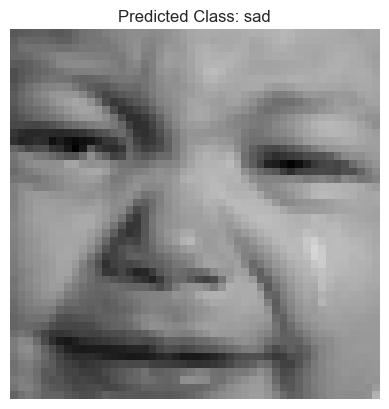

1/1 [==============================] - 0s 20ms/step
Image: im90.png


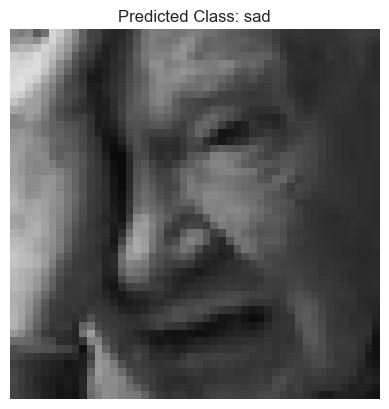

In [49]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('Model3.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    image = cv2.resize(image, (48, 48))  # Resize to 48x48
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    return image

# Folder containing test images
test_folder = r'D:\AMIT\Project\Dataset\test\2'

label_mapping = {class_index: class_label for class_index, class_label in enumerate(label_encoder.classes_)}

# Iterate through the images in the folder
for image_file in os.listdir(test_folder):
    image_path = os.path.join(test_folder, image_file)
    
    # Preprocess the image
    image = preprocess_image(image_path)
    
    # Perform prediction
    predictions = model.predict(np.array([image]))
    predicted_class_index = np.argmax(predictions)
    
    # Get the predicted class label in string format
    predicted_class_label = label_mapping[predicted_class_index]
    
    # Display the original image filename
    print(f'Image: {image_file}')

    # Display the image along with its predicted class
    plt.imshow(cv2.imread(image_path))
    plt.title(f'Predicted Class: {predicted_class_label}')
    plt.axis('off')
    plt.show()


In [48]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
classifier =load_model('Model3.h5')

emotion_labels = ['Angry','Disgusted','Fearful','Happy','Neutral', 'Sad', 'Surprised']

cap = cv2.VideoCapture(0)



while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 20ms/step
